# Analog Document Generation

<p float="left">
  <img src="static\analog_doc_gen_pipeline.png" width="800" />
</p>

Genalog provides a simple interface (`AnalogDocumentGeneration`) to programmatic generate documents with degradation from a body of text.

In [16]:
from genalog.pipeline import AnalogDocumentGeneration

## Configurations

You will need to supply the following information:

1. `STYLE_COMBINATIONS`: a dictionary defining the combination of styles to generate per text document (i.e. a copy of the same text document is generate per style combination). Example is shown below:

```
    STYLE_COMBINATION = {
        "language": ["en_US"],
        "font_family": ["Segoe UI"],
        "font_size": ["12px"],
        "text_align": ["left"],
        "hyphenate": [False],
    }
``` 
Genalog depends on Weasyprint as the engine to render these CSS styles. Most of these fields are standard CSS properties and accepts common values as specified in [W3C CSS Properties](https://www.w3.org/Style/CSS/all-properties.en.html). For details, please see [Weasyprint Documentation](https://weasyprint.readthedocs.io/en/stable/features.html#fonts).

In [17]:
STYLE_COMBINATIONS = {
    "language": ["en_US"],
     "font_family": ["Segeo UI"],
     "font_size": ["12px"],
     "text_align": ["justify"],
     "hyphenate": [True, False],
}

2. `DEGRADATIONS`: a list defining the sequence of degradation effects applied onto the synthetic images. Each element is a two-element tuple of which the first element is one of the method names from  `genalog.degradation.effect` and the second element is the corresponding function keyword arguments.

        DEGRADATIONS = [
            ("blur", {"radius": 3}),
            ("bleed_through", {"alpha": 0.8}),
            ("morphology", {"operation": "open", "kernel_shape": (3,3), "kernel_type": "ones"}), 
        ]
        
    The example above will apply degradation effects to synthetic images in the sequence of: 
    
            blur -> bleed_through -> morphological operation (open)
    
For the full list of supported degradation effects, please see [documentation on degradation](https://github.com/microsoft/genalog/blob/main/genalog/degradation/README.md).
    


In [18]:
from genalog.degradation.degrader import ImageState

DEGRADATIONS = [
    ("morphology", {"operation": "open", "kernel_shape":(9,9), "kernel_type":"plus"}),
    ("morphology", {"operation": "close", "kernel_shape":(9,1), "kernel_type":"ones"}),
    ("salt", {"amount": 0.7}),
    ("overlay", {
        "src": ImageState.ORIGINAL_STATE,
        "background": ImageState.CURRENT_STATE,
    }),
    ("bleed_through", {
        "src": ImageState.CURRENT_STATE,
        "background": ImageState.ORIGINAL_STATE,
        "alpha": 0.8,
        "offset_x": -6,
        "offset_y": -12,
    }),
    ("pepper", {"amount": 0.005}),
    ("blur", {"radius": 5}),
    ("salt", {"amount": 0.15}),
]

3. `HTML_TEMPLATE`: name of html template used to generate the synthetic images. The `genalog` package has the following default templates: 

    1. `columns.html.jinja` 
    2. `letter.html.jinja`
    3. `text_block.html.jinja`

<p float="left">
  <img src="sample/generation/columns_Times_11px.png" width="300" />
  <img src="sample/generation/letter_Times_11px.png" width="300" />
  <img src="sample/generation/text_block_Times_11px.png" width="300" />
</p>

We use `Jinja` to prepare html templates. You can find example of these Jinja templates in [our source code](https://github.com/microsoft/genalog/tree/main/genalog/generation/templates).

For custom templates, please set `template_path` to the folder of containing them. You can find more information from our [`document_generation.ipynb`](https://github.com/microsoft/genalog/blob/main/example/document_generation.ipynb).

In [19]:
HTML_TEMPLATE = "text_block.html.jinja"


In [20]:
IMG_RESOLUTION = 300 # dots per inch (dpi) of the generated pdf/image
sample_file = "sample/generation/example.txt"

doc_generation = AnalogDocumentGeneration(styles=STYLE_COMBINATIONS, degradations=DEGRADATIONS, resolution=IMG_RESOLUTION, template_path=None) # for custom templates, please set template_path.
img_array = doc_generation.generate_img(sample_file, HTML_TEMPLATE, target_folder=None) # returns the raw image bytes if target_folder is not specified

C:\Users\menou\AppData\Local\Temp\ipykernel_7136\1603751353.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


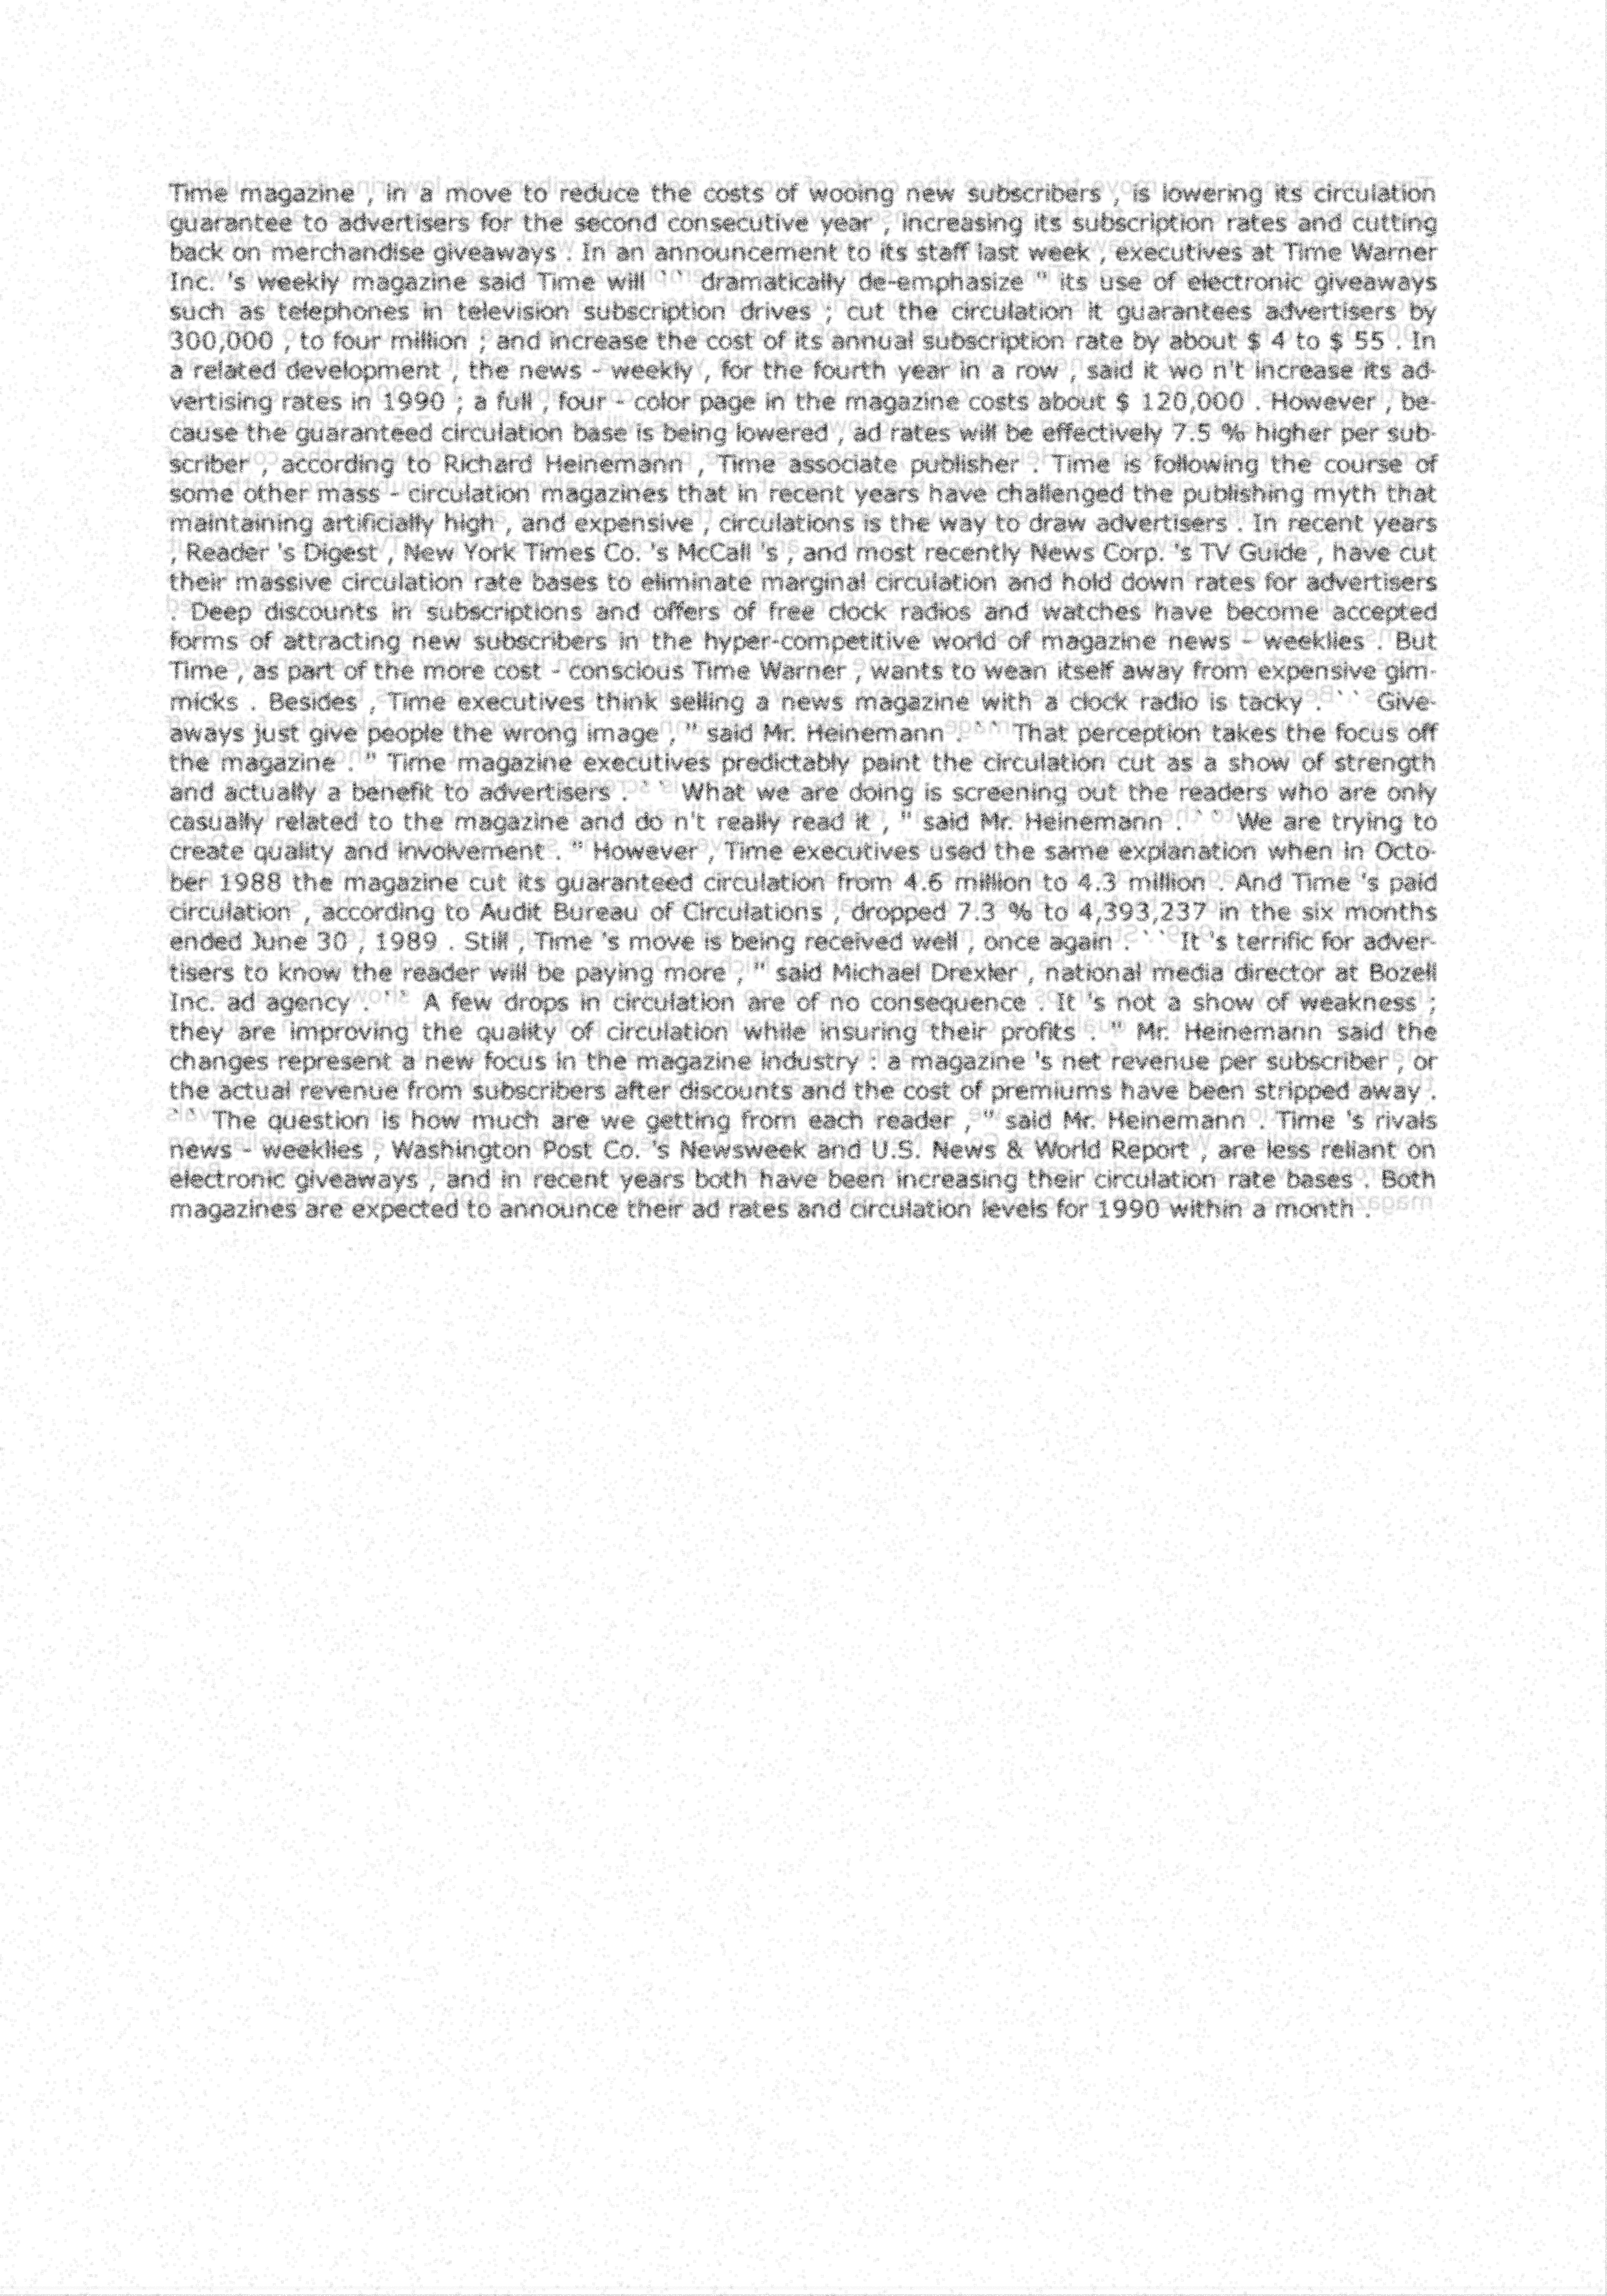

In [21]:
import cv2
from IPython.core.display import Image, display

_, encoded_image = cv2.imencode('.png', img_array)
display(Image(data=encoded_image, width=600))

In [22]:
from genalog.pipeline import generate_dataset_multiprocess

DST_PATH = "data" # where on disk to write the generated image

generate_dataset_multiprocess(
    [sample_file], DST_PATH, STYLE_COMBINATIONS, DEGRADATIONS, HTML_TEMPLATE, 
    resolution=IMG_RESOLUTION, batch_size=5
)

  0%|          | 0/1 [00:00<?, ?it/s]

Storing generated images in data
Splitting 1 documents into 1 batches with size 5


100%|██████████| 1/1 [00:04<00:00,  4.60s/it]

Time to generate 1 documents: 4.881 sec
